# The Sparks Foundation - Data Science and Business Analystics Internship

**Task 1 :- Prediction using Supervised Machine Learning (ML)**

**In this task, we have to Predict the percentage of an student based on the no. of study hours using the Linear Regression.**

Dataset link:- http://bit.ly/w-data

**Author:- Prince Kumar Singh**

**import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**reading the from given link**

In [2]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Plot the distribution of Scores**

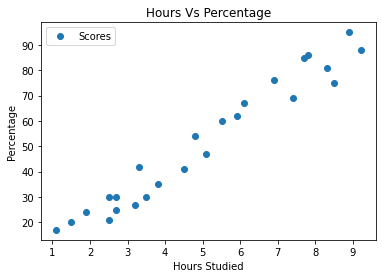

In [6]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage')
plt.show()

**From the above plot, we can clearly view that there is a postitive relationship between the number of hours Studied and Percentage.**

# Linear Regression Model

**Split the data in test and train**

In [7]:
y = data[['Scores']].values
x = data[['Hours']].values
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state = 0)  

# Training the Algorithm

In [8]:
lg = LinearRegression()
lg.fit(X_train, y_train)

LinearRegression()

# Plot the regression line

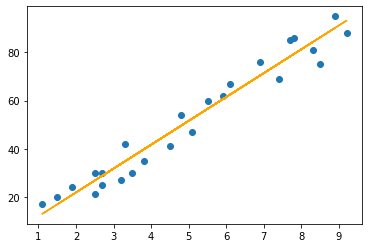

In [9]:
# Plotting the regression line
line = lg.coef_*x+lg.intercept_

# Plotting for the test data
plt.scatter (x,y)
plt.plot (x, line, color = 'orange')
plt.show()

# Accuracy of Train and Test data

In [10]:
test = lg.score(X_test, y_test)
print('Accuracy of Test data is', test)
train = lg.score(X_train, y_train)
print('Accuracy of Train data is', train)

Accuracy of Test data is 0.9454906892105356
Accuracy of Train data is 0.9515510725211552


In [11]:
prediction = lg.predict(X_test)

In [12]:
prediction

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [13]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})

In [14]:
data.head(10)

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Let's find out what will be predicted score if a student studies for 9.25 hrs/day**

In [15]:
print('Score of a student who studied for 9.25 hrs/day:', lg.predict([[9.25]]))

Score of a student who studied for 9.25 hrs/day: [[93.69173249]]


# Model Evaluation Metrics

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
